Viewing Sample data and performing Preprocessing if required

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("/Users/ani/Desktop/Python_Project/WDC Bike Sharing EDA /day.xls")
print(df.head())
print(df.isnull().sum())                                                                                                                                                           

ModuleNotFoundError: No module named 'numpy'

Summary of the dataset

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       731 non-null    int64         
 1   Date          731 non-null    datetime64[ns]
 2   Season        731 non-null    object        
 3   Year          731 non-null    int64         
 4   Month         731 non-null    object        
 5   Holiday       731 non-null    object        
 6   Weekday       731 non-null    object        
 7   Workingday    731 non-null    object        
 8   Weather       731 non-null    object        
 9   Temp          731 non-null    float64       
 10  Atemp         731 non-null    float64       
 11  Humidity      731 non-null    float64       
 12  Windspeed     731 non-null    float64       
 13  Casual        731 non-null    int64         
 14  Registered    731 non-null    int64         
 15  Total Rented  731 non-null    int64     

,instant,Date,Year,Temp,Atemp,Humidity,Windspeed,Casual,Registered,Total Rented
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2011.500684,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,2011.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2011.000000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,2012.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,2012.000000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,2012.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,0.500342,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452


Checking for outliers in the dataset and exploring the patterns in the outliers if there are any

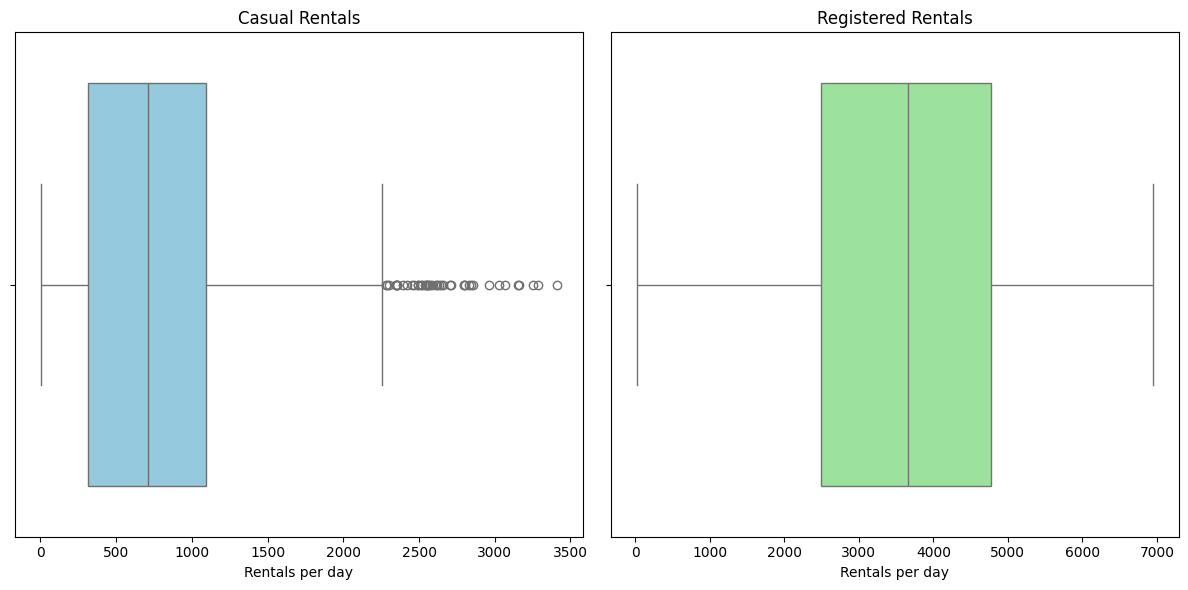

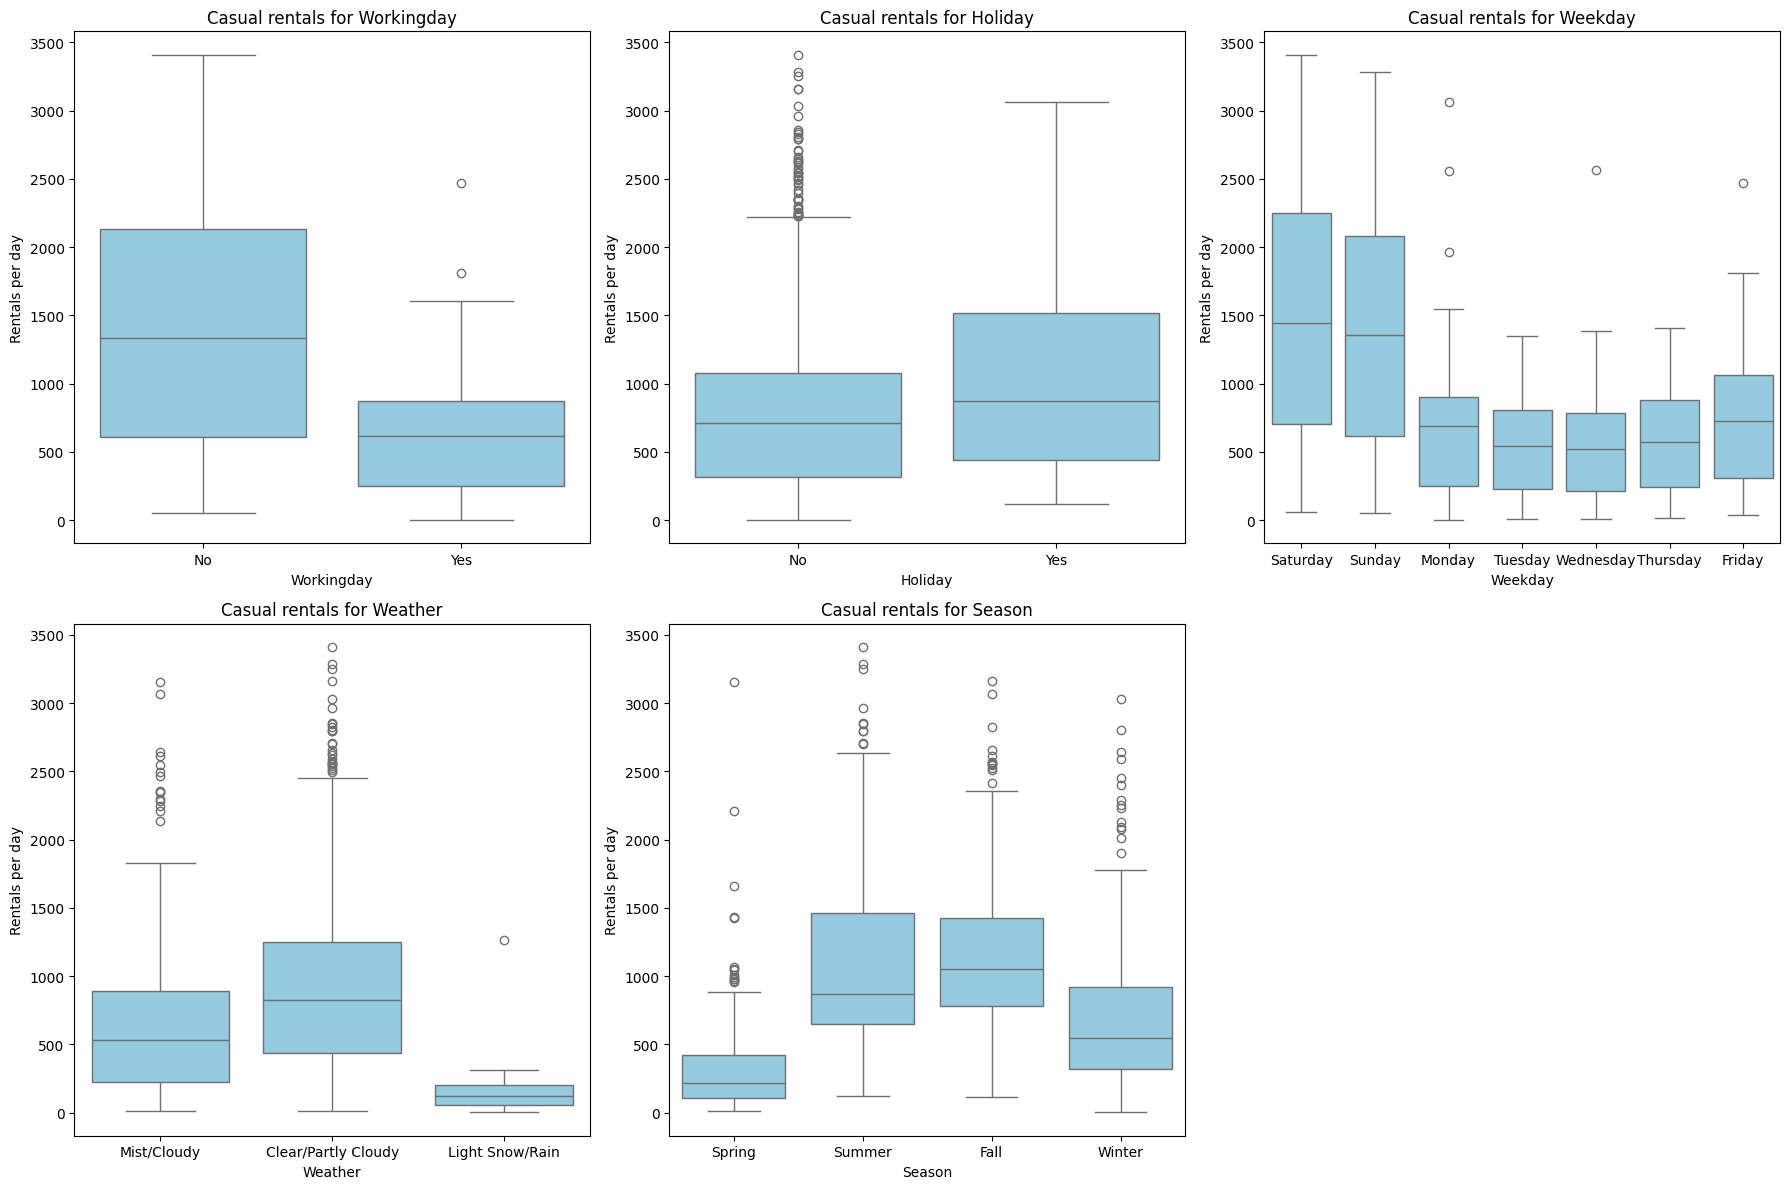

In [ ]:
# Checking for outliers in Casual VS Registered

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df, x="Casual", ax=axs[0], color="skyblue")
axs[0].set_xlabel("Rentals per day")
axs[0].set_title("Casual Rentals")


sns.boxplot(data=df, x="Registered", ax=axs[1], color="lightgreen")
axs[1].set_xlabel("Rentals per day")
axs[1].set_title("Registered Rentals")

plt.tight_layout()
plt.show()


# Outliers in Casual Rentals based on various conditions

fig0, axs0 = plt.subplots(2,3, figsize = (18, 12))

xval = ["Workingday", "Holiday", "Weekday", "Weather", "Season"]
idx = 0

for r in range(0,2):
    for c in range(0,3):
        if(idx<5):
            sns.boxplot(data=df, x = xval[idx], y = "Casual",ax = axs0[r][c], color = "skyblue")
            
            axs0[r][c].set_xlabel(xval[idx])
            axs0[r][c].set_ylabel("Rentals per day")
            axs0[r][c].set_title("Casual rentals for " + xval[idx])
            
            idx = idx + 1

        else:
            break
        
plt.axis("off")
plt.tight_layout()
plt.show()
        

# For Registered Users

# print("***** For Registered Users *****")

# for xaxis in ["Holiday", "Weekday", "Weather", "Season"]:

#     sns.boxplot(data=df, x = xaxis, y="Registered")
#     plt.xlabel(xaxis)
#     plt.ylabel("Rentals per day")
#     plt.title("Registered rentals for " + xaxis)
#     plt.grid()
#     plt.show()


BarSubplots

In [ ]:


fig, axs = plt.subplots(3,3,figsize=(15, 12))

#--------Total--------

sns.barplot(data = df, x = "Season", y = "Total Rented", ax = axs[0,0], color = "coral")
axs[0,0].set_title('Average Bike Rentals per Season (Total)')
axs[0,0].set_xlabel("Season")
axs[0,0].set_ylabel('Average Rentals')
# plt.show()

sns.barplot(data = df, x = "Workingday", y = "Total Rented", ax = axs[0,1], color = "coral")
axs[0,1].set_title('Average Bike Rentals per Workingday (Total)')
axs[0,1].set_xlabel("Workingday")
axs[0,1].set_ylabel('Average Rentals')
# plt.show()

sns.barplot(data = df, x = "Weather", y = "Total Rented", ax = axs[0,2], color = "coral")
axs[0,2].set_title('Average Bike Rentals in each Weather (Total)')
axs[0,2].set_xlabel("Weather")
axs[0,2].set_ylabel('Average Rentals')
# plt.show()


#---------Casual-----------

sns.barplot(data = df, x = "Season", y = "Casual", ax = axs[1,0], estimator=np.median, color = "skyblue")
axs[1,0].set_title('Average Bike Rentals per Season (Casual)')
axs[1,0].set_xlabel("Season")
axs[1,0].set_ylabel('Average Rentals')
# plt.show()

sns.barplot(data = df, x = "Workingday", y = "Casual", ax = axs[1,1], estimator=np.median, color = "skyblue")
axs[1,1].set_title('Average Bike Rentals per Workingday (Casual)')
axs[1,1].set_xlabel("Workingday")
axs[1,1].set_ylabel('Average Rentals')
# plt.show()

sns.barplot(data = df, x = "Weather", y = "Casual", ax = axs[1,2], estimator=np.median, color = "skyblue")
axs[1,2].set_title('Average Bike Rentals in each Weather (Casual)')
axs[1,2].set_xlabel("Weather")
axs[1,2].set_ylabel('Average Rentals')
# plt.show()

#-------Registered----------

sns.barplot(data = df, x = "Season", y = "Registered", ax = axs[2,0], color="lightgreen")
axs[2,0].set_title('Average Bike Rentals per Season (Registered)')
axs[2,0].set_xlabel("Season")
axs[2,0].set_ylabel('Average Rentals')
# plt.show()

sns.barplot(data = df, x = "Workingday", y = "Registered",ax = axs[2,1], color="lightgreen")
axs[2,1].set_title('Average Bike Rentals per Workingday (Registered)')
axs[2,1].set_xlabel("Workingday")
axs[2,1].set_ylabel('Average Rentals')
# plt.show()

sns.barplot(data = df, x = "Weather", y = "Registered", ax = axs[2,2], color="lightgreen")
axs[2,2].set_title('Average Bike Rentals in each Weather (Registered)')
axs[2,2].set_xlabel("Weather")
axs[2,2].set_ylabel('Average Rentals')
# plt.show()

plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined

Using Pie Chart to show the share of Casual and Registered Users in the Total bike rentals in year 2011 and 2012

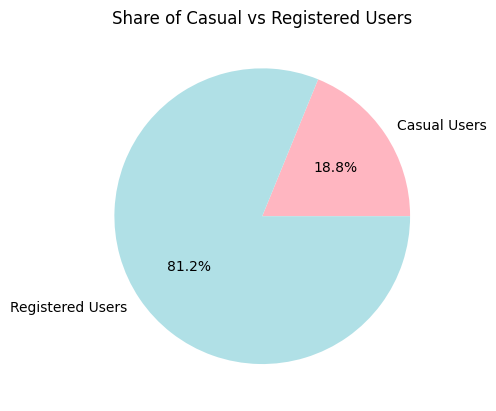

In [ ]:
values = [df["Casual"].sum(), df["Registered"].sum()]
lbl = ("Casual Users", "Registered Users")

plt.pie(values, labels = lbl, autopct = "%.1f%%", colors = ("#FFB6C1", "#B0E0E6"))
plt.title("Share of Casual vs Registered Users")
plt.show()

Heatmap

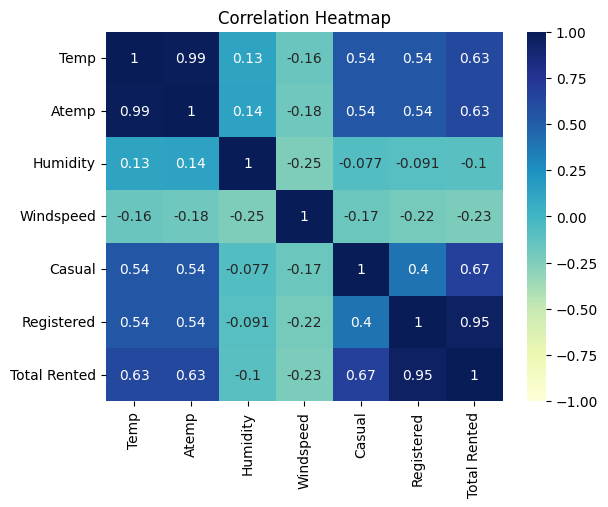

In [ ]:
df2 = df[["Temp", "Atemp", "Humidity", "Windspeed", "Casual", "Registered", "Total Rented"]]

corr_matrix = df2.corr()

sns.heatmap(data = corr_matrix, annot = True, cmap = "YlGnBu",vmin = -1, vmax = 1)
plt.title("Correlation Heatmap")
# plt.tight_layout()
plt.show()

Scatter Plot to show correlation between Temperature and Total Bike Rented.
We can see that as the temp rises upto a certain point , the bike rentals increase, but after a certain temperature i.e around 30 degree celcius and above, the total bike rentals start to decrease significantly as it gets too hot!!

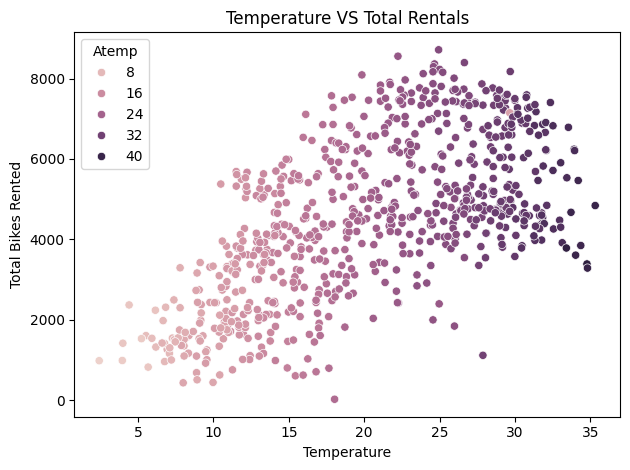

In [ ]:
sns.scatterplot(data = df, x = "Temp", y = "Total Rented", hue = "Atemp")
plt.title("Temperature VS Total Rentals")
plt.xlabel("Temperature")
plt.ylabel("Total Bikes Rented")
plt.tight_layout()
plt.show()

Rentals Over Time

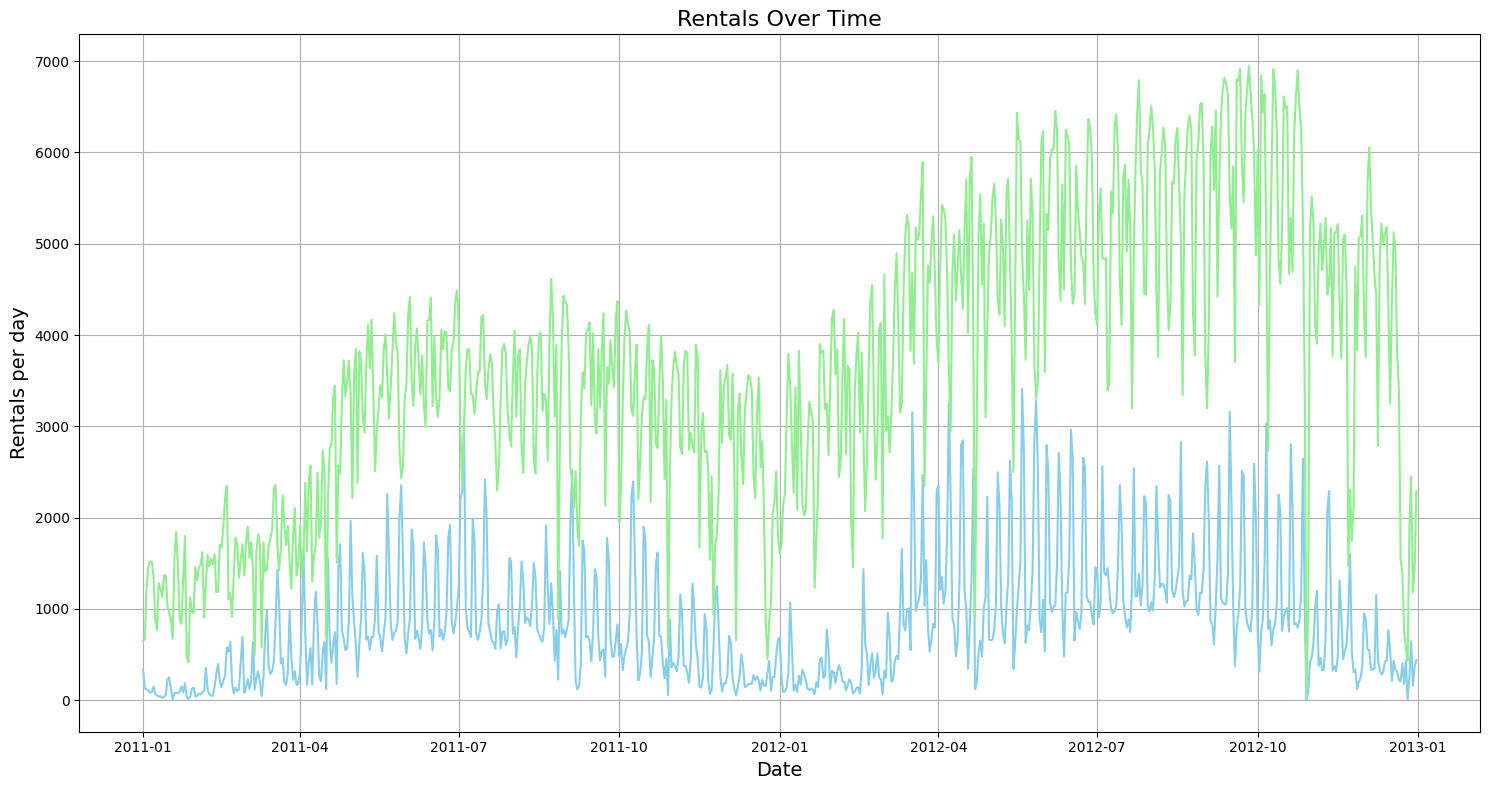

In [ ]:

plt.figure(figsize=(15,8))
# plt.plot(df["Date"], df["Total Rented"], color="coral")
plt.plot(df["Date"], df["Casual"], color = "skyblue")
plt.plot(df["Date"], df["Registered"], color = "lightgreen")

plt.title("Rentals Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Rentals per day", fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()